# Data Quality inspection for New EMIS Data
Based on newly downloaded EMIS dataset and preprocessed one, I apply 6 factor model from Michel on them to get ground truth. Then, I will run prediction models on them. To get ground truth, I follow the following steps.
1. Find out those companies have non-empty total revenue, operating profit (EBIT), and net income (separately and in all);
2. Find out Shareholders whose names are for human, not company;

## Read pickle binary data

In [10]:
import pandas as pd
df_comp_info = pd.read_pickle('../../Database/EMIS/preprocessed/comp_info_20180309.pickle')
df_fina_info = pd.read_pickle('../../Database/EMIS/preprocessed/fina_info_20180309.pickle')

In [2]:
print(df_comp_info.shape, df_fina_info.shape)

((14831, 28), (10000, 161))


## Inspect data quality
Look into how many companies have non-empty Total operating revenue (revenue), Operating profit (EBIT), and Net Profit for The period (net income). Those are the main financial information for Michel's 6 factor models.

In [102]:
print("\nColumn names for company information: %s\n" % (list(df_comp_info),))
print("\nColumn names for financial information: %s\n" % (list(df_fina_info),))


Column names for company information: ['Index_Num', 'Company', 'Key_Executives', 'Employee_Number', 'Employee_Info_Year', 'Financial_Auditors', 'Main_Products', 'Phone', 'Email', 'Business_Description', 'Shareholder_String', 'Revenue_2017', 'Revenue_2016', 'Revenue_2015', 'Revenue_2014', 'Revenue_2013', 'Revenue_2012', 'Revenue_Estimated_Klooks', 'Industry_List', 'NAICS_Num_List', 'Status', 'CNPJ', 'Audited', 'Consolidated', 'Shareholder_Num', 'Shareholder_Index', 'Shareholder', 'Equity']


Column names for financial information: [('Index_Num', ''), ('Company', ''), ('Industry_List', ''), ('NAICS_Num_List', ''), ('CNPJ', ''), ('Cash_and_Cash_Equivalents', '2017'), ('Cash_and_Cash_Equivalents', '2016'), ('Cash_and_Cash_Equivalents', '2015'), ('Cash_and_Cash_Equivalents', '2014'), ('Cash_and_Cash_Equivalents', '2013'), ('Cash_and_Cash_Equivalents', '2012'), ('Current_assets', '2017'), ('Current_assets', '2016'), ('Current_assets', '2015'), ('Current_assets', '2014'), ('Current_assets', 

In [103]:
# The non-empty Total operating revenue
import numpy as np
def Count_Non_Empty(col_name, df):
    """Count non-empty entries in a level 0 column from a multiindex dataframe."""
    # import numpy as np
    #year = ['2017','2016','2015','2014','2013','2012']
    counts = [0]*6
    for idx, row in df[col_name].iterrows():
        row_isnot_nan = [1-int(np.isnan(ele)) for ele in list(row)]
        counts = [x+y for x,y in zip(counts, row_isnot_nan)]
    return counts

In [104]:
print("\nThe non-empty entries for years ['2017','2016','2015','2014','2013','2012']\n")
print("\nTotal operating revenue: %s" % (Count_Non_Empty('Total_operating_revenue', df_fina_info)))
print("\nOperating profit(EBIT): %s" % (Count_Non_Empty('Operating_profit_(EBIT)', df_fina_info)))
print("\nNet Profit(Loss) for the Period: %s" % (Count_Non_Empty('Net_Profit_(Loss)_for_the_Period', df_fina_info)))


The non-empty entries for years ['2017','2016','2015','2014','2013','2012']


Total operating revenue: [538, 3990, 4318, 4429, 4233, 139]

Operating profit(EBIT): [538, 3993, 4332, 4491, 4346, 148]

Net Profit(Loss) for the Period: [538, 3993, 4331, 4488, 4340, 147]


In [105]:
def Count_Non_Empty_InAll(col_name_list, df):
    """Count non-empty entries in a level 0 columns in all from a multiindex dataframe."""
    # import numpy as np
    #year = ['2017','2016','2015','2014','2013','2012']
    counts = [0]*6
    for idx, row in df[col_name_list].iterrows():
        row_isnan = [1]*6
        for col_name in col_name_list:
            row_isnot_nan = [(1-int(np.isnan(ele)))*ele0 for ele0, ele in zip(row_isnan, list(row[col_name]))]
        counts = [x+y for x,y in zip(counts, row_isnot_nan)]
    return counts

In [106]:
print("\nThe non-empty entries for years ['2017','2016','2015','2014','2013','2012']\n")
key_col_list = ['Total_operating_revenue','Operating_profit_(EBIT)','Net_Profit_(Loss)_for_the_Period']
print("\n(Total operating revenue, Operating profit(EBIT), Net Profit(Loss) for the Period) in all:\n %s" % (
        Count_Non_Empty_InAll(key_col_list, df_fina_info)))


The non-empty entries for years ['2017','2016','2015','2014','2013','2012']


(Total operating revenue, Operating profit(EBIT), Net Profit(Loss) for the Period) in all:
 [538, 3990, 4317, 4425, 4225, 138]


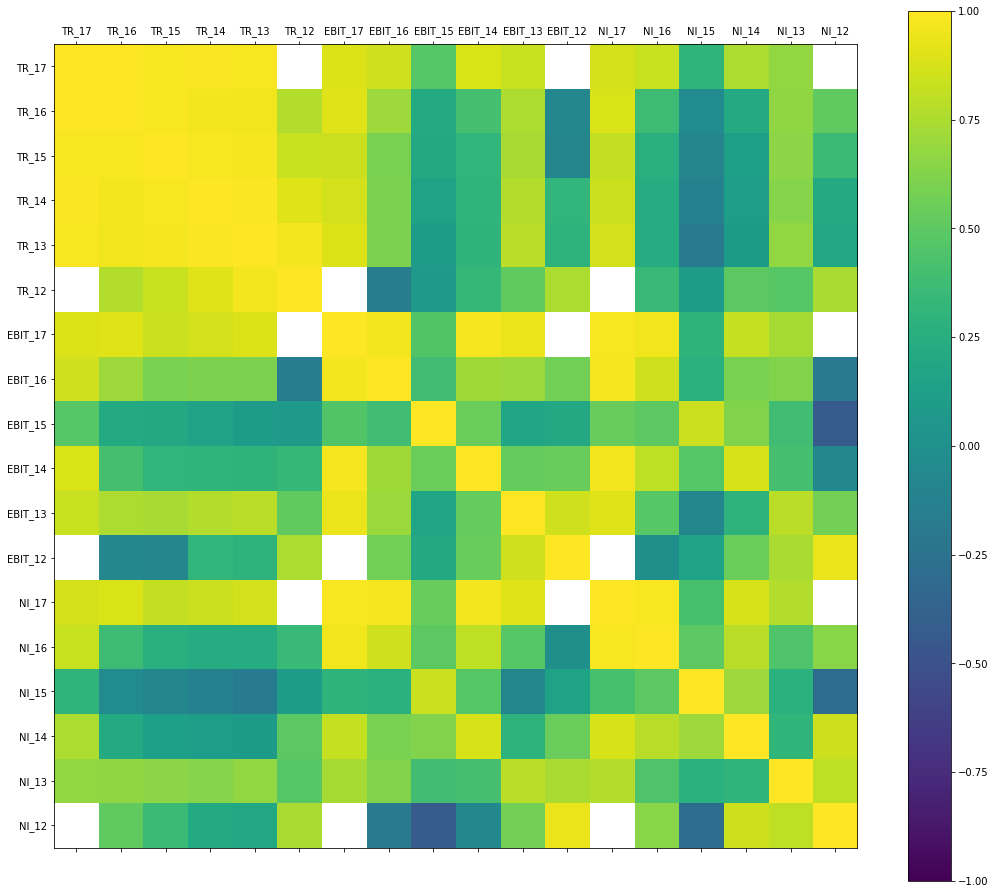

In [107]:
# Correlation matrix of ['Total_operating_revenue','Operating_profit_(EBIT)','Net_Profit_(Loss)_for_the_Period']
import matplotlib.pyplot as plt
%matplotlib inline
def Cor_Mat_Plot(df,names,figsize):
    """Plot correlation heat map with names as tick labels."""
    # import matplotlib.pyplot as plt
    correlations = df.corr()
    # plot correlation matrix
    fig = plt.figure(figsize=figsize, dpi= 80, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(111)
    cax = ax.matshow(correlations, vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0,len(list(df)),1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()
    
year_abr = ['17','16','15','14','13','12']
col_name_abr = ['TR','EBIT','NI']
names = ['_'.join([na,ye]) for na in col_name_abr for ye in year_abr]
figsize = (18, 16)
Cor_Mat_Plot(df_fina_info[key_col_list],names,figsize)

### Data Inspection:
1. From above correlation matrix, we saw that the data quality for Total operating revenue, Operating profit (EBIT), and Net income are good, because they are not highliy correlated.
2. The data of Total operating revenue are very consistent across years, but operating profit and net income are not.

Total operating revenue


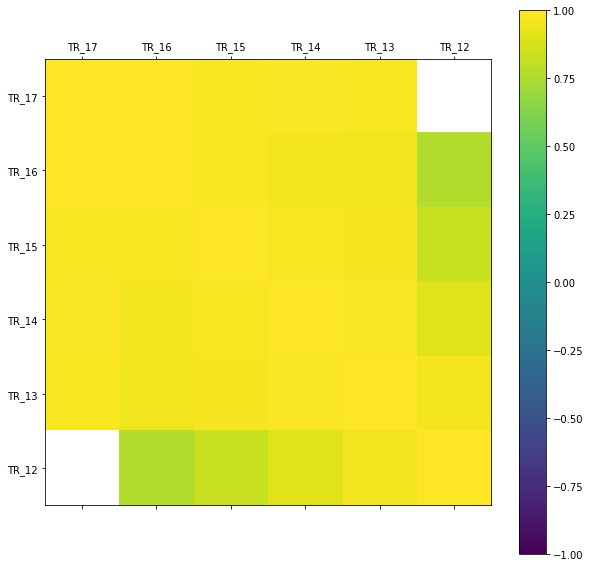

In [108]:
# Total operating revenue
print("Total operating revenue")
Cor_Mat_Plot(df_fina_info[key_col_list[0]],names[:6],(10,10))

Operating profit(EBIT)


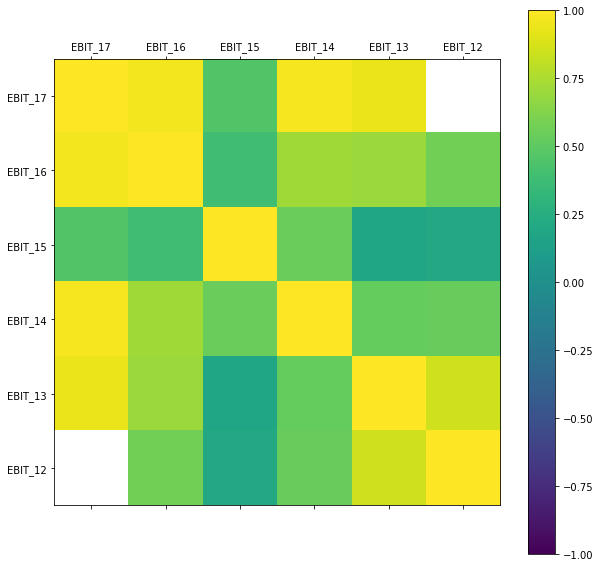

In [109]:
# Operating profit(EBIT)
print("Operating profit(EBIT)")
Cor_Mat_Plot(df_fina_info[key_col_list[1]],names[6:12],(10,10))

Net Profit(Loss) for the Period (Net Income)


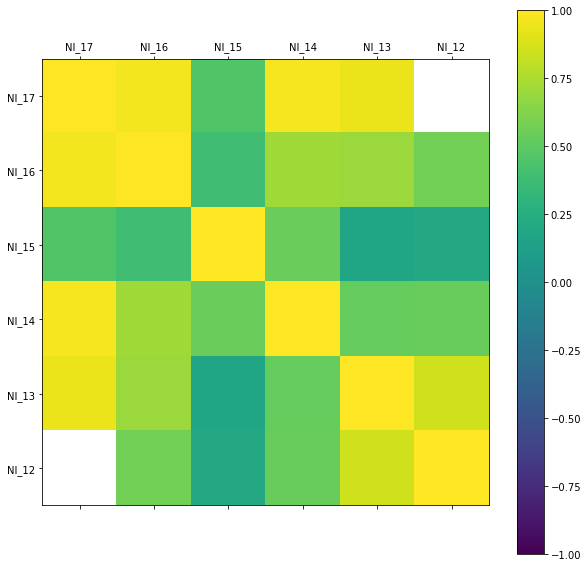

In [110]:
# Net Profit(Loss) for the Period (Net Income)
print("Net Profit(Loss) for the Period (Net Income)")
Cor_Mat_Plot(df_fina_info[key_col_list[1]],names[12:18],(10,10))

### Note from Michel
Michel told me that in 14 and 15, Brzail has a big economic crisis. Here, we see that in EBIT and NI, data from 15 is very negative correlated with other years.

Year 2017: ['Total_operating_revenue','Operating_profit_(EBIT)','Net_Profit_(Loss)_for_the_Period']


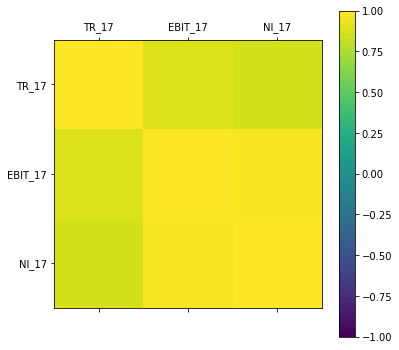

In [111]:
# Correlation matrix of ['Total_operating_revenue','Operating_profit_(EBIT)','Net_Profit_(Loss)_for_the_Period']
# for year 2017
print("Year 2017: ['Total_operating_revenue','Operating_profit_(EBIT)','Net_Profit_(Loss)_for_the_Period']")
col_list = []
for col_name in key_col_list:
    col_list.append((col_name, '2017'))
Cor_Mat_Plot(df_fina_info[col_list],[names[i] for i in [0,6,12]],(6,6))

Year 2016: ['Total_operating_revenue','Operating_profit_(EBIT)','Net_Profit_(Loss)_for_the_Period']


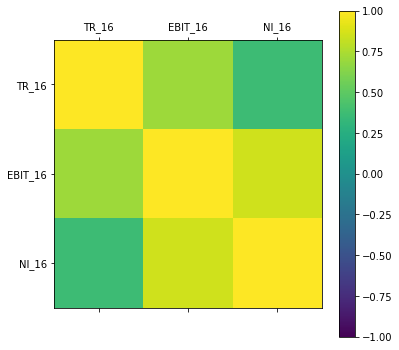

In [112]:
# Correlation matrix of ['Total_operating_revenue','Operating_profit_(EBIT)','Net_Profit_(Loss)_for_the_Period']
# for year 2016
print("Year 2016: ['Total_operating_revenue','Operating_profit_(EBIT)','Net_Profit_(Loss)_for_the_Period']")
col_list = []
for col_name in key_col_list:
    col_list.append((col_name, '2016'))
Cor_Mat_Plot(df_fina_info[col_list],[names[i] for i in [1,7,13]],(6,6))

Year 2015: ['Total_operating_revenue','Operating_profit_(EBIT)','Net_Profit_(Loss)_for_the_Period']


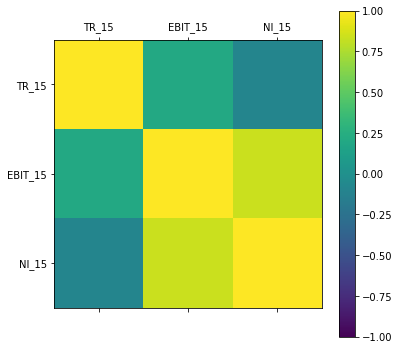

In [113]:
# Correlation matrix of ['Total_operating_revenue','Operating_profit_(EBIT)','Net_Profit_(Loss)_for_the_Period']
# for year 2015
print("Year 2015: ['Total_operating_revenue','Operating_profit_(EBIT)','Net_Profit_(Loss)_for_the_Period']")
col_list = []
for col_name in key_col_list:
    col_list.append((col_name, '2015'))
Cor_Mat_Plot(df_fina_info[col_list],[names[i] for i in [2,8,14]],(6,6))

Year 2014: ['Total_operating_revenue','Operating_profit_(EBIT)','Net_Profit_(Loss)_for_the_Period']


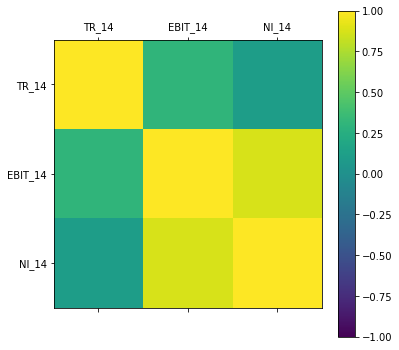

In [114]:
# Correlation matrix of ['Total_operating_revenue','Operating_profit_(EBIT)','Net_Profit_(Loss)_for_the_Period']
# for year 2014
print("Year 2014: ['Total_operating_revenue','Operating_profit_(EBIT)','Net_Profit_(Loss)_for_the_Period']")
col_list = []
for col_name in key_col_list:
    col_list.append((col_name, '2014'))
Cor_Mat_Plot(df_fina_info[col_list],[names[i] for i in [3,9,15]],(6,6))

Year 2013: ['Total_operating_revenue','Operating_profit_(EBIT)','Net_Profit_(Loss)_for_the_Period']


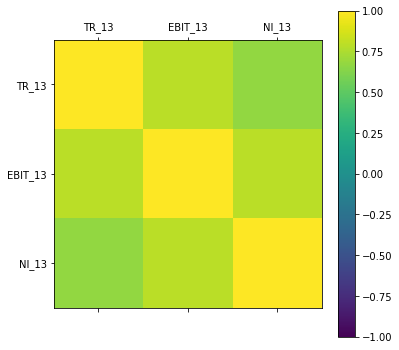

In [115]:
# Correlation matrix of ['Total_operating_revenue','Operating_profit_(EBIT)','Net_Profit_(Loss)_for_the_Period']
# for year 2013
print("Year 2013: ['Total_operating_revenue','Operating_profit_(EBIT)','Net_Profit_(Loss)_for_the_Period']")
col_list = []
for col_name in key_col_list:
    col_list.append((col_name, '2013'))
Cor_Mat_Plot(df_fina_info[col_list],[names[i] for i in [4,10,16]],(6,6))

Year 2012: ['Total_operating_revenue','Operating_profit_(EBIT)','Net_Profit_(Loss)_for_the_Period']


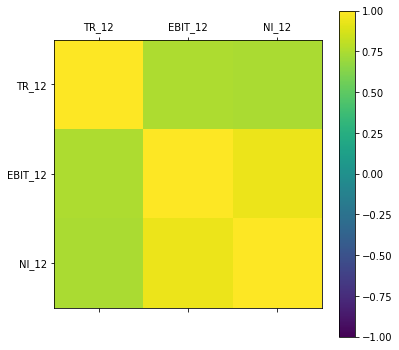

In [116]:
# Correlation matrix of ['Total_operating_revenue','Operating_profit_(EBIT)','Net_Profit_(Loss)_for_the_Period']
# for year 2012
print("Year 2012: ['Total_operating_revenue','Operating_profit_(EBIT)','Net_Profit_(Loss)_for_the_Period']")
col_list = []
for col_name in key_col_list:
    col_list.append((col_name, '2012'))
Cor_Mat_Plot(df_fina_info[col_list],[names[i] for i in [5,11,17]],(6,6))

### Correlation of different financial factors in different years
As mentioned by Michel, in 14 and 15, companies total revenue is very negative correlated with EBIT and NI, which can be resulted from economic crisis.

In [117]:
correlations = df_fina_info[key_col_list].corr()
correlations

Column                                Total_operating_revenue            \
Year                                                     2017      2016   
Column                           Year                                     
Total_operating_revenue          2017                1.000000  0.995968   
                                 2016                0.995968  1.000000   
                                 2015                0.980172  0.979267   
                                 2014                0.987419  0.968696   
                                 2013                0.982871  0.958602   
                                 2012                     NaN  0.765844   
Operating_profit_(EBIT)          2017                0.895311  0.899026   
                                 2016                0.857452  0.703757   
                                 2015                0.478170  0.224549   
                                 2014                0.888213  0.409977   
                                 2013                0.833991  0.754224   
                                 2012                     NaN -0.074013   
Net_Profit_(Loss)_for_the_Period 2017                0.870528  0.883881   
                                 2016                0.828145  0.374441   
                                 2015                0.309264 -0.037954   
                                 2014                0.757810  0.222341   
                                 2013                0.675530  0.668219   
                                 2012                     NaN  0.513408   

Column                                                                         \
Year                                       2015      2014      2013      2012   
Column                           Year                                           
Total_operating_revenue          2017  0.980172  0.987419  0.982871       NaN   
                                 2016  0.979267  0.968696  0.958602  0.765844   
                                 2015  1.000000  0.982475  0.975880  0.833170   
                                 2014  0.982475  1.000000  0.991801  0.903892   
                                 2013  0.975880  0.991801  1.000000  0.965298   
                                 2012  0.833170  0.903892  0.965298  1.000000   
Operating_profit_(EBIT)          2017  0.839887  0.861988  0.896575       NaN   
                                 2016  0.593818  0.602862  0.602340 -0.154337   
                                 2015  0.210834  0.152783  0.106417  0.072481   
                                 2014  0.314744  0.309070  0.297376  0.332305   
                                 2013  0.738327  0.768773  0.793023  0.510539   
                                 2012 -0.093342  0.314973  0.294288  0.753203   
Net_Profit_(Loss)_for_the_Period 2017  0.818382  0.842548  0.864448       NaN   
                                 2016  0.253380  0.241161  0.239658  0.346342   
                                 2015 -0.089416 -0.124493 -0.175094  0.106320   
                                 2014  0.127966  0.114280  0.086050  0.492714   
                                 2013  0.653269  0.639887  0.676167  0.477673   
                                 2012  0.361444  0.224069  0.193573  0.743341   

Column                                Operating_profit_(EBIT)            \
Year                                                     2017      2016   
Column                           Year                                     
Total_operating_revenue          2017                0.895311  0.857452   
                                 2016                0.899026  0.703757   
                                 2015                0.839887  0.593818   
                                 2014                0.861988  0.602862   
                                 2013                0.896575  0.602340   
                                 2012                     NaN -0.154337   
Operating_profit_(EBIT)          2017          

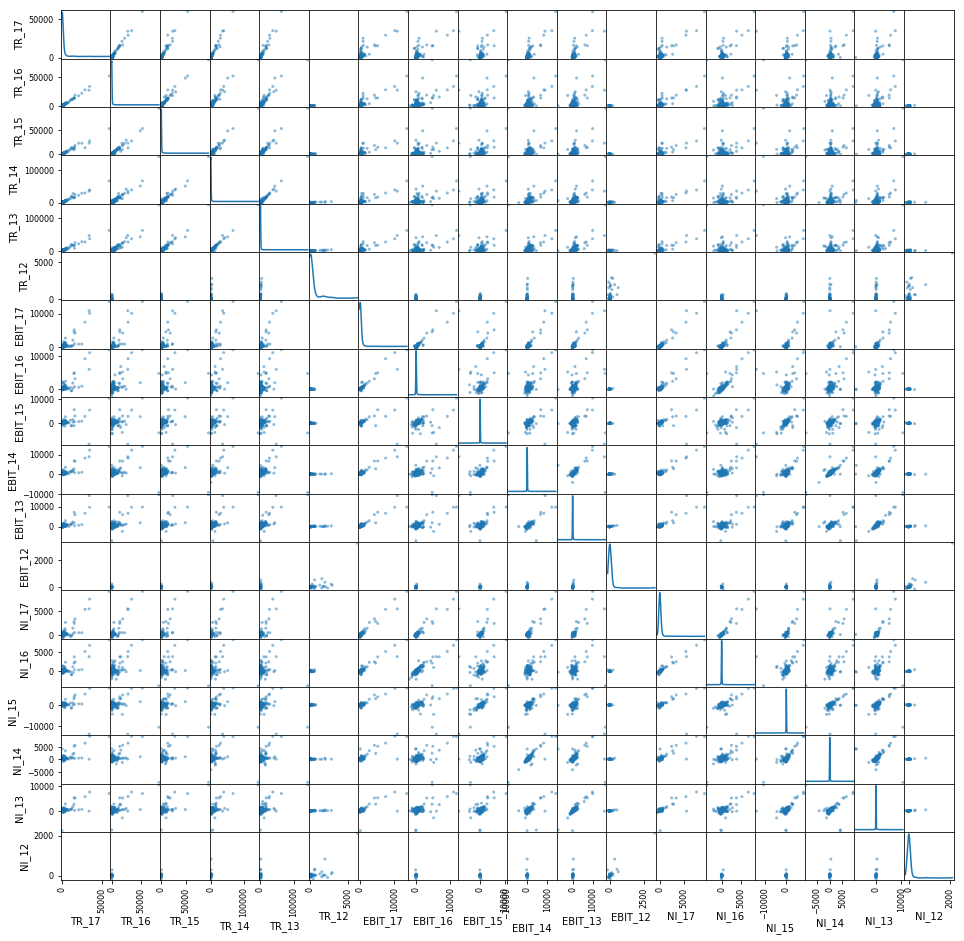

In [118]:
# Scatterplot Matrix for ['Total_operating_revenue','Operating_profit_(EBIT)','Net_Profit_(Loss)_for_the_Period']
from pandas.plotting import scatter_matrix
# Preprocess the dataset for scatter matrix plot
df_scatter_plot = pd.DataFrame(columns=names)
key_col_list = ['Total_operating_revenue','Operating_profit_(EBIT)','Net_Profit_(Loss)_for_the_Period']
year = ['2017','2016','2015','2014','2013','2012']
idx = 0
for col_name in key_col_list:
    for ye in year:
        df_scatter_plot[names[idx]] = df_fina_info[col_name, ye]
        idx += 1
# Plot scatter matrix plot
scatter_matrix(df_scatter_plot,figsize=(16, 16),diagonal='kde')
plt.show()

Total operating revenue


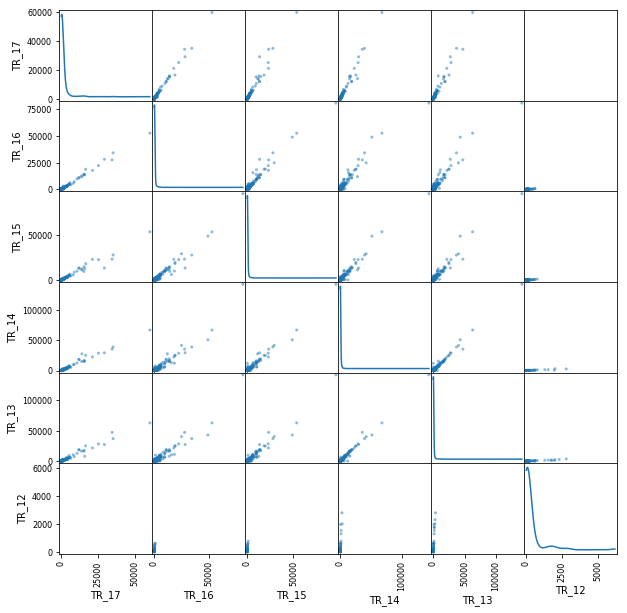

In [119]:
# Total operating revenue
print("Total operating revenue")
scatter_matrix(df_scatter_plot.iloc[:,0:6],figsize=(10, 10),diagonal='kde')
plt.show()

Operating profit(EBIT)


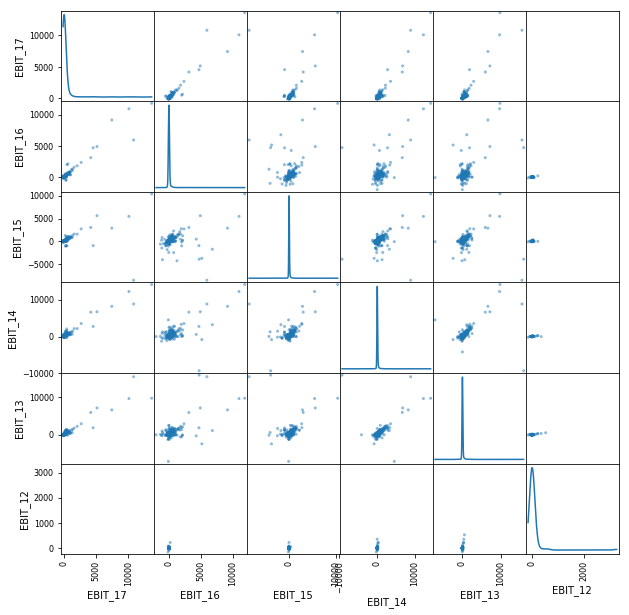

In [120]:
# Operating profit(EBIT)
print("Operating profit(EBIT)")
scatter_matrix(df_scatter_plot.iloc[:,6:12],figsize=(10, 10),diagonal='kde')
plt.show()

Net Profit(Loss) for the Period (Net Income)


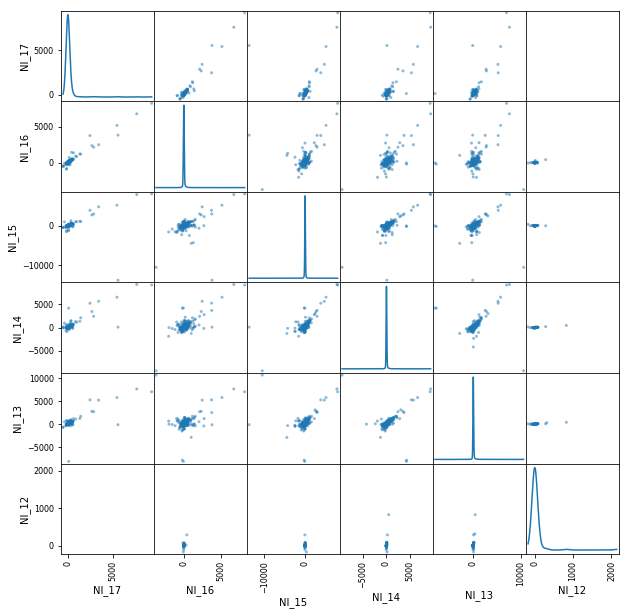

In [121]:
# Net Profit(Loss) for the Period (Net Income)
print("Net Profit(Loss) for the Period (Net Income)")
scatter_matrix(df_scatter_plot.iloc[:,12:18],figsize=(10, 10),diagonal='kde')
plt.show()

Year 2017: ['Total_operating_revenue','Operating_profit_(EBIT)','Net_Profit_(Loss)_for_the_Period']


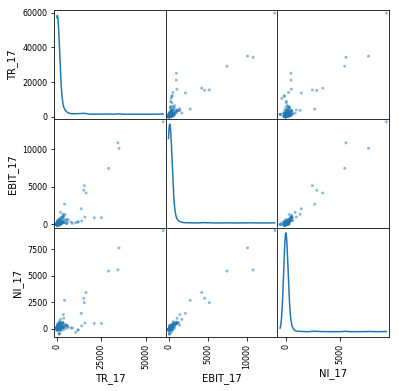

In [122]:
# Scatter plot matrix of ['Total_operating_revenue','Operating_profit_(EBIT)','Net_Profit_(Loss)_for_the_Period']
# for year 2017
print("Year 2017: ['Total_operating_revenue','Operating_profit_(EBIT)','Net_Profit_(Loss)_for_the_Period']")
scatter_matrix(df_scatter_plot.iloc[:,[0,6,12]],figsize=(6, 6),diagonal='kde')
plt.show()

Year 2016: ['Total_operating_revenue','Operating_profit_(EBIT)','Net_Profit_(Loss)_for_the_Period']


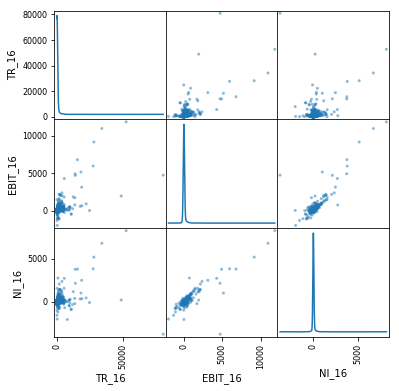

In [123]:
# Scatter plot matrix of ['Total_operating_revenue','Operating_profit_(EBIT)','Net_Profit_(Loss)_for_the_Period']
# for year 2016
print("Year 2016: ['Total_operating_revenue','Operating_profit_(EBIT)','Net_Profit_(Loss)_for_the_Period']")
scatter_matrix(df_scatter_plot.iloc[:,[1,7,13]],figsize=(6, 6),diagonal='kde')
plt.show()

Year 2015: ['Total_operating_revenue','Operating_profit_(EBIT)','Net_Profit_(Loss)_for_the_Period']


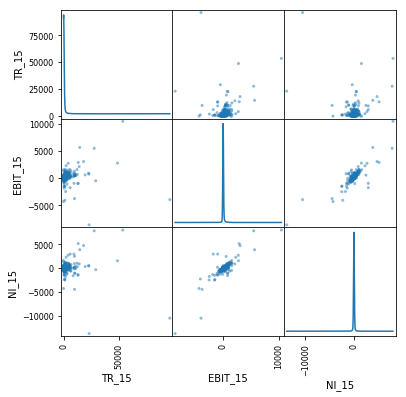

In [124]:
# Scatter plot matrix of ['Total_operating_revenue','Operating_profit_(EBIT)','Net_Profit_(Loss)_for_the_Period']
# for year 2015
print("Year 2015: ['Total_operating_revenue','Operating_profit_(EBIT)','Net_Profit_(Loss)_for_the_Period']")
scatter_matrix(df_scatter_plot.iloc[:,[2,8,14]],figsize=(6, 6),diagonal='kde')
plt.show()

Year 2014: ['Total_operating_revenue','Operating_profit_(EBIT)','Net_Profit_(Loss)_for_the_Period']


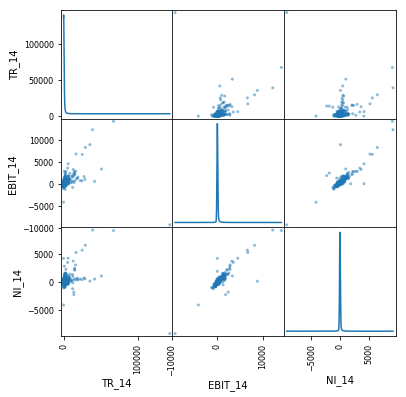

In [125]:
# Scatter plot matrix of ['Total_operating_revenue','Operating_profit_(EBIT)','Net_Profit_(Loss)_for_the_Period']
# for year 2014
print("Year 2014: ['Total_operating_revenue','Operating_profit_(EBIT)','Net_Profit_(Loss)_for_the_Period']")
scatter_matrix(df_scatter_plot.iloc[:,[3,9,15]],figsize=(6, 6),diagonal='kde')
plt.show()

Year 2013: ['Total_operating_revenue','Operating_profit_(EBIT)','Net_Profit_(Loss)_for_the_Period']


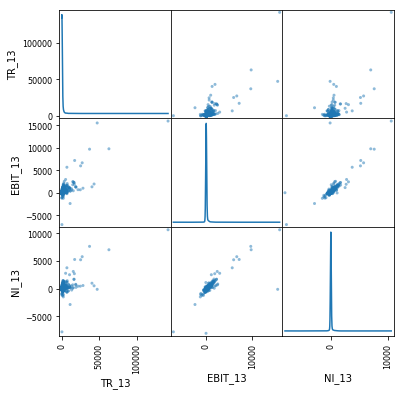

In [126]:
# Scatter plot matrix of ['Total_operating_revenue','Operating_profit_(EBIT)','Net_Profit_(Loss)_for_the_Period']
# for year 2013
print("Year 2013: ['Total_operating_revenue','Operating_profit_(EBIT)','Net_Profit_(Loss)_for_the_Period']")
scatter_matrix(df_scatter_plot.iloc[:,[4,10,16]],figsize=(6, 6),diagonal='kde')
plt.show()

Year 2012: ['Total_operating_revenue','Operating_profit_(EBIT)','Net_Profit_(Loss)_for_the_Period']


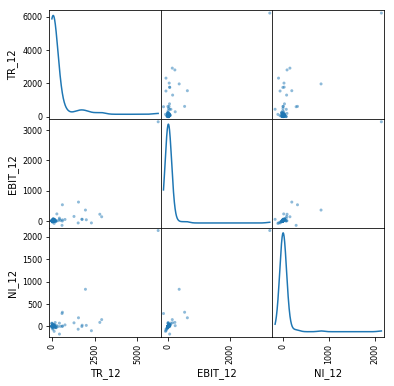

In [127]:
# Scatter plot matrix of ['Total_operating_revenue','Operating_profit_(EBIT)','Net_Profit_(Loss)_for_the_Period']
# for year 2012
print("Year 2012: ['Total_operating_revenue','Operating_profit_(EBIT)','Net_Profit_(Loss)_for_the_Period']")
scatter_matrix(df_scatter_plot.iloc[:,[5,11,17]],figsize=(6, 6),diagonal='kde')
plt.show()

In [128]:
df_scatter_plot[:5]

,TR_17,TR_16,TR_15,TR_14,TR_13,TR_12,EBIT_17,EBIT_16,EBIT_15,EBIT_14,EBIT_13,EBIT_12,NI_17,NI_16,NI_15,NI_14,NI_13,NI_12
0,NaN,80952.74,96106.79,143411.44,141639.39,NaN,NaN,4732.10,-3950.42,-9306.79,15903.74,NaN,NaN,-3745.31,-10535.35,-9310.19,10649.86,NaN
1,59816.49,52720.05,53572.39,67369.76,62837.28,NaN,13610.86,11842.88,10423.62,14140.66,9739.81,NaN,9238.68,8233.66,8007.48,9183.21,7034.64,NaN
2,NaN,48977.85,48818.13,51169.43,43046.42,NaN,NaN,1937.31,2749.63,3324.83,1923.49,NaN,NaN,203.13,1536.27,1021.91,517.67,NaN
3,34959.26,34220.02,27747.29,39162.75,37027.09,NaN,10090.44,10965.20,5471.22,12233.53,9658.34,NaN,7602.21,6770.56,7834.94,9283.43,7647.98,NaN
4,34302.29,27632.63,23152.18,35565.15,47206.46,NaN,10818.04,5948.76,-8573.71,8844.91,15477.74,NaN,5535.31,3817.52,-13778.13,93.25,-119.23,NaN


In [129]:
df_fina_info[key_col_list][:5]

Column Total_operating_revenue                                                 \
Year                      2017      2016      2015       2014       2013 2012   
0                          NaN  80952.74  96106.79  143411.44  141639.39  NaN   
1                     59816.49  52720.05  53572.39   67369.76   62837.28  NaN   
2                          NaN  48977.85  48818.13   51169.43   43046.42  NaN   
3                     34959.26  34220.02  27747.29   39162.75   37027.09  NaN   
4                     34302.29  27632.63  23152.18   35565.15   47206.46  NaN   

Column Operating_profit_(EBIT)                                               \
Year                      2017      2016      2015      2014      2013 2012   
0                          NaN   4732.10  -3950.42  -9306.79  15903.74  NaN   
1                     13610.86  11842.88  10423.62  14140.66   9739.81  NaN   
2                          NaN   1937.31   2749.63   3324.83   1923.49  NaN   
3                     10090.44  10965.20   5471.22  12233.53   9658.34  NaN   
4                     10818.04   5948.76  -8573.71   8844.91  15477.74  NaN   

Column Net_Profit_(Loss)_for_the_Period                                        \
Year                               2017     2016      2015     2014      2013   
0                                   NaN -3745.31 -10535.35 -9310.19  10649.86   
1                               9238.68  8233.66   8007.48  9183.21   7034.64   
2                                   NaN   203.13   1536.27  1021.91    517.67   
3                               7602.21  6770.56   7834.94  9283.43   7647.98   
4                               5535.31  3817.52 -13778.13    93.25   -119.23   

Column       
Year   2012  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

## Select human based on shareholder names

In [18]:
from unidecode import unidecode
import re
# The pattern for non-alphanumeric characters are coming from Jupyter Notebook ExperimentRegression
patt_non_alphanum = r'[\.\&/:,\'\"\-;\\+=\#`!?>\|\_]' 
# Note that have to add escape sign before '-', o.w. it is interpreted as a range symbol and as a result, numbers are ignored

def Normalize_Name(patt_non_alphanum, target_df, source_col_name, target_col_name, include_parenth=False):
    """Normalize names by decoding accented alphabet, replacing non-alphabetnumeric characters with
    white space, and spliting based on white space. A tag to mark whether include info in parenthesis."""
    # from unidecode import unidecode
    # import re
    target_df[target_col_name]=""
    for idx,name in enumerate(target_df[source_col_name]):
        # Notice that the idx from enumerate() and the later .at[idx, ...] can be different. The enumerate() gives the 
        # the index in the dataframe, while the .at[idx, ...] gives the idx-th row.
        comp_name = unidecode(name.strip().lower())
        normalized_list = []
        para_ele = re.findall(r'[\(\[](.+)[\)\]]',comp_name)# Extract inside () or []
        if para_ele:
            comp_name = re.sub(r'\(.+\)', ' ', comp_name)
            if include_parenth:
                para_ele = [y for x in para_ele for y in re.sub(patt_non_alphanum,' ', x).split()]# Flatten a list of lists
                normalized_list.extend(para_ele)
        sa_ele = re.findall(r' s[\./]{1}a[\.]?',comp_name)# Extract "s.a." or "s/a", and put "s.a." back in the string.
        if sa_ele:
            for _ in range(len(sa_ele)):
                normalized_list.append('s.a.')
            comp_name = re.sub(r's[\./]{1}a[\.]?', ' ', comp_name)
        ltd_ele = re.findall(r' ltd[a]?[.]?',comp_name)# Extract "ltda." or "ltda" or "ltd"; and put "ltd" back in the string.
        if ltd_ele:
            for _ in range(len(ltd_ele)):
                normalized_list.append('ltd')
            comp_name = re.sub(r'ltd[a]?[.]?', ' ', comp_name)
        lp_ele = re.findall(r' l[\./]{1}p[\.]?',comp_name)# Extract "l.p." or "l.p" or "lp"; and put "lp" back in the string.
        if lp_ele:
            for _ in range(len(lp_ele)):
                normalized_list.append('lp')
            comp_name = re.sub(r'l[\./]{1}p[\.]?', ' ', comp_name)
        sl_ele = re.findall(r' s[\./]{1}l[\.]?',comp_name)# Extract "s.l." or "s.l" or "sl"; and put "sl" back in the string.
        if sl_ele:
            for _ in range(len(sl_ele)):
                normalized_list.append('sl')
            comp_name = re.sub(r's[\./]{1}l[\.]?', ' ', comp_name)
        cv_ele = re.findall(r' c[\./]{1}v[\.]?',comp_name)# Extract "c.v." or "c.v" or "cv"; and put "cv" back in the string.
        if cv_ele:
            for _ in range(len(cv_ele)):
                normalized_list.append('cv')
            comp_name = re.sub(r'c[\./]{1}v[\.]?', ' ', comp_name)
        bv_ele = re.findall(r' b[\./]{1}v[\.]?',comp_name)# Extract "b.v." or "b.v" or "bv"; and put "bv" back in the string.
        if bv_ele:
            for _ in range(len(bv_ele)):
                normalized_list.append('bv')
            comp_name = re.sub(r'b[\./]{1}v[\.]?', ' ', comp_name)

        comp_name = re.sub(patt_non_alphanum,' ', comp_name)
        normalized_list.extend(comp_name.split())
        print idx, normalized_list, comp_name.split()
        normalized_list.sort()
        target_df.at[idx, target_col_name]= ' '.join(normalized_list)

In [19]:
Normalize_Name(patt_non_alphanum,df_comp_info,"Shareholder","Shareholder_Name_Normalized",False)

0 ['uniao', 'federal'] ['uniao', 'federal']
1 ['s.a.', 'bndes', 'participacoes', 'bndespar'] ['bndes', 'participacoes', 'bndespar']
2 ['banco', 'nacional', 'de', 'desenvolvimento', 'economico', 'e', 'social'] ['banco', 'nacional', 'de', 'desenvolvimento', 'economico', 'e', 'social']
3 ['blackrock', 'inc'] ['blackrock', 'inc']
4 ['s.a.', 'fb', 'participacoes'] ['fb', 'participacoes']
5 ['s.a.', 'bndes', 'participacoes', 'bndespar'] ['bndes', 'participacoes', 'bndespar']
6 ['s.a.', 'itausa', 'investimentos', 'itau'] ['itausa', 'investimentos', 'itau']
7 ['s.a.', 'iupar', 'itau', 'unibanco', 'participacoes'] ['iupar', 'itau', 'unibanco', 'participacoes']
8 ['blackrock', 'inc'] ['blackrock', 'inc']
9 ['s.a.', 'litel', 'participacoes'] ['litel', 'participacoes']
10 ['blackrock', 'inc'] ['blackrock', 'inc']
11 ['s.a.', 'bndes', 'participacoes', 'bndespar'] ['bndes', 'participacoes', 'bndespar']
12 ['ltd', 'mitsui', 'co'] ['mitsui', 'co']
13 ['s.a.', 'bradespar'] ['bradespar']
14 ['cidade', '

In [5]:
df_comp_info[:20]

,Index_Num,Company,Key_Executives,Employee_Number,Employee_Info_Year,Financial_Auditors,Main_Products,Phone,Email,Business_Description,...,NAICS_Num_List,Status,CNPJ,Audited,Consolidated,Shareholder_Num,Shareholder_Index,Shareholder,Equity,Shareholder_Name_Normalized
0,1.0,Petroleo Brasileiro S.A.,Murilo Pinto de Oliveira Ferreira (Chairman of...,68829.0,2016.0,PwC,"petroleum, automotive gasoline, diesel, natura...",+55 21 3224-2040,acionistas@petrobras.com.br,The company Petrobras was founded in October 1...,...,32411;21113;21112,0,33000167000101,1,1,3,0,União Federal,28.67,federal uniao
1,1.0,Petroleo Brasileiro S.A.,Murilo Pinto de Oliveira Ferreira (Chairman of...,68829.0,2016.0,PwC,"petroleum, automotive gasoline, diesel, natura...",+55 21 3224-2040,acionistas@petrobras.com.br,The company Petrobras was founded in October 1...,...,32411;21113;21112,0,33000167000101,1,1,3,1,Bndes Participacoes S.A. - Bndespar,9.67,bndes bndespar participacoes s.a.
2,1.0,Petroleo Brasileiro S.A.,Murilo Pinto de Oliveira Ferreira (Chairman of...,68829.0,2016.0,PwC,"petroleum, automotive gasoline, diesel, natura...",+55 21 3224-2040,acionistas@petrobras.com.br,The company Petrobras was founded in October 1...,...,32411;21113;21112,0,33000167000101,1,1,3,2,Banco Nacional De Desenvolvimento Economico E ...,6.87,banco de desenvolvimento e economico nacional ...
3,2.0,Banco Santander S.A.,Ana Patricia Botin-Sanz de Sautuola Y o'Shea (...,NaN,NaN,Deloitte,NaN,+55 34 90211-2211,acionistasbdr@santander.com.br,"Banco Santander S.A. was founded in 1857, head...",...,523;522,0,05707616000110,1,1,1,0,Blackrock INC,5.01,blackrock inc
4,3.0,Jbs S.A.,Joesley Mendonca Batista (Chairman of the Boar...,225422.0,2016.0,BDO,beef manufacturing,"+55 11 3144-4447, +55 11 3144-4224",ri@jbs.com.br,"Initiating as a meat trader in 1953, currently...",...,31151;3116;316,0,02916265000160,1,1,2,0,Fb Participacoes S.A.,42.31,fb participacoes s.a.
5,3.0,Jbs S.A.,Joesley Mendonca Batista (Chairman of the Boar...,225422.0,2016.0,BDO,beef manufacturing,"+55 11 3144-4447, +55 11 3144-4224",ri@jbs.com.br,"Initiating as a meat trader in 1953, currently...",...,31151;3116;316,0,02916265000160,1,1,2,1,Bndes Participacoes S.A. - Bndespar,21.32,bndes bndespar participacoes s.a.
6,4.0,Itau Unibanco Holding S.A.,Alberto Sozin Furugem (Board of Directors - Co...,94779.0,2016.0,PwC,NaN,NaN,relacionamento.bacen@itau-unibanco.com.br,"Holding that controls Banco Itaú, a commercial...",...,522;55,0,60872504000123,1,1,3,0,Itausa - Investimentos Itau S.A.,37.36,investimentos itau itausa s.a.
7,4.0,Itau Unibanco Holding S.A.,Alberto Sozin Furugem (Board of Directors - Co...,94779.0,2016.0,PwC,NaN,NaN,relacionamento.bacen@itau-unibanco.com.br,"Holding that controls Banco Itaú, a commercial...",...,522;55,0,60872504000123,1,1,3,1,Iupar - Itau Unibanco Participacoes S.A.,26.10,itau iupar participacoes s.a. unibanco
8,4.0,Itau Unibanco Holding S.A.,Alberto Sozin Furugem (Board of Directors - Co...,94779.0,2016.0,PwC,NaN,NaN,relacionamento.bacen@itau-unibanco.com.br,"Holding that controls Banco Itaú, a commercial...",...,522;55,0,60872504000123,1,1,3,2,Blackrock INC,3.56,blackrock inc
9,5.0,Vale S.A.,Dan Antonio Marinho Conrado (Chairman of the B...,73062.0,2016.0,KPMG,"mining, steel producing, logistics and energy",+55 21 3814-4540,rogerio.nogueira@vale.com,"The company, formerly known as Companhia Vale ...",...,21221;488;482;331,0,33592510000154,1,1,5,0,Litel Participacoes S.A.,22.57,litel participacoes s.a.


In [1]:
# Go through the first 500 samples of shareholder names in Portuguese and English and see what words can be
# used to check if a shareholder name is from a human or a company. The keywords set are below.
keyword_detect_company = ['Company', 'Limited', 'Banque', 'Fundo', 'Partners', 'Prtners', 'Inv', 'Investimento',
                                 'Investimentos', 'Banco', 'Bank', 'Corporate', 'Grupo', 'Prefeitura', 'SARL', 'Municipio',
                                 'Petrobras', 'Associacao', 'Assoc', 'Part', 'capital', 'Treasury','LLC', 'Corporation',
                                 'Parts', 'Companhia', 'Cia', 'Overseas', 'Holding', 'Agric', 'Governo', 'Sec', 'Secretaria',
                                 'Group', 'Estado', 'Investors', 'Asset', 'Empresa', 'Income', 'Brasil', 'Participacoes',
                         'Brasil', 'Recuperacao', 'Judicial', 'credit', 'Desenvolvimento', 'multi', 'Multiestrategia',
                         'Brazilian', 'Logistica', 'Latina', 'America', 'Servico', 'Garantia', 'Tempo', 'Depositario',
                         'Commodities', 'Eletricidade', 'Servs', 'Energia', 'Global', 'Infra', 'Road', 'Economica',
                         'Financiamento', 'Transmissora', 'Eletrica', 'Hospitalares', 'Clinicas', 'Accenture', 'Beneficente',
                         'Shares', 'Services', 'Motorola','Motors','Holdings','Financial', 'Holding', 'Eletricas', 'Federal',
                         'Steel', 'offshores', 'International', 'Mining', 'Resources', 'Economicos', 'Recursos', 'Time', 'world',
                         'video', 'Finance', 'Intl', 'Petroleo', 'Solar', 'Cidade', 'Comercial', 'centrais', 'Seguros', 'fund',
                         'gas','General', 'Mercantille', 'Infraestrutura', 'Mgmt', 'Representacoes', 'Markets', 'Telecom',
                         'co', 'inc', 'Standard', 'Seguranca', 'Solucoes', 'Zurich', 'Pagamento', 'Identificacao', 'Airport',
                         'Industria', 'Material', 'Funcionarios', 'Social', 'Agencia', 'TRANSPORT', 'Nacional', 'Securitaria',
                         'Medicamentos', 'Distribuicao', 'Geografica', 'Produtos', 'Farmaceuticos', 'Civil', 'Auto', 'Tecnologia',
                         'corp', 'Trust', 'Management', 'Assurances', 'Producers', 'Alcool', 'Brazil', 'limitada',
                         'tecidos', 'Educacional', 'Sociedade', 'Positivo', 'life', 'investment', 'gmbh', 'automoveis', 'Usina',
                         'Telecomunicacoes', 'Leasing', 'Settlement', 'Empreendimentos', 'Incorporated', 'Empreed', 'Motores',
                         'Departamento', 'Fundacao', 'Industriais', 'Transportes', 'Engenharia', 'Industrial', 'Tesouraria',
                         'llp', 'Participaciones', 'Fertilizer', 'Funds', 'ind', 'foods', 'Municipalities', 'Lp',
                         'Desenv', 'Consulting', 'Fundos', 'Fdo','Aeronautica','Inversiones','systemes', 'Transportation', 'Print',
                         'Cooperatier', 'price']
# Take 'Familia', 'Sales' out, because 'Familia' is the family business; and 'Sales' is one of family names in Brazil and
# people with this family name is likely to have very high net worth.
keyword_bankrupted = 'Em Recuperacao Judicial' # Bankrupted in English
keyword_detect_company.append(keyword_bankrupted)

keyword_detect_company = [word.lower() for word in keyword_detect_company]
# Incoporate English and Portuguese translations of those keywords and expand the size of keywords set
from googletrans import Translator
translator = Translator()
keyword_detect_company_en = []
keyword_detect_company_pt = []
for keyword in keyword_detect_company:
    keyword_en = unidecode(translator.translate(keyword, src='pt', dest='en').text.lower())
    keyword_detect_company_en.append(keyword_en)
    keyword_pt = unidecode(translator.translate(keyword, src='en', dest='pt').text.lower())
    keyword_detect_company_pt.append(keyword_pt)
    #print("Keyword: %s; Translation en: %s; Translation pt: %s" % (keyword, keyword_en, keyword_pt))

keyword_detect_company_set = set(keyword_detect_company) | set(keyword_detect_company_en) | set(keyword_detect_company_pt)
keyword_detect_company = list(keyword_detect_company_set)

keyword_detect_company.sort()
print keyword_detect_company

NameError: name 'unidecode' is not defined

In [26]:
# Check if a shareholder name contains any word from keywords set

# Actually, those company names in the shareholder column have a large portion of funds or holding companies.
# We are interested in the people behind those holding companies because they are potential HNWIs. The reason that 
# CapitalIQ and EMIS doesn't include information in those companies is because CapitalIQ and EMIS are mainly used by
# investment banking who are interested in operating companies not people (so they can invest money into them).
# However, we are interested in family office, wealth management so that we are interested in those companies. And
# we can get shareholders for those holding or fund companies from Brazil IRF, because they have complete information.
# However, we don't know whether we can get those information from IRF. Remember those holding or fund companies
# would not show up in CapitalIQ and EMIS because they are not interested in those companies (but I can do a test on
# this to check if this is true).
df_comp_info["Shareholder_Is_Human"]=True
for idx, name in enumerate(df_comp_info["Shareholder_Name_Normalized"]):
    if not name:
        print("Index: %s; %s" % (idx, 'Empty name'))
        df_comp_info.at[idx, "Shareholder_Is_Human"] = False
    if not re.search(r' ', name.strip()): # If there is no space in the name, it should not be a human name
        print("Index: %s; %s" % (idx, 'No space'))
        df_comp_info.at[idx, "Shareholder_Is_Human"] = False
    if df_comp_info["Shareholder_Is_Human"][idx]:
        if re.findall(r's\.a\.|\bltd\b|\blp\b|\bsl\b|\bcv\b|\bbv\b',name):
            print("Index: %s; Keyword: %s; Name: %s" % (idx, 's.a./ltd/lp/sl/cv/bv', name))
            df_comp_info.at[idx, "Shareholder_Is_Human"] = False
            continue
        for keyword in keyword_detect_company_set:
            if re.findall(r'\b'+keyword+r'\b', name):
                print("Index: %s; Keyword: %s; Name: %s" % (idx, keyword, name))
                df_comp_info.at[idx, "Shareholder_Is_Human"] = False
                break

df_comp_info[df_comp_info["Shareholder_Is_Human"]==True].shape

Index: 0; Keyword: federal; Name: federal uniao
Index: 1; Keyword: s.a./ltd/lp/sl/cv/bv; Name: bndes bndespar participacoes s.a.
Index: 2; Keyword: social; Name: banco de desenvolvimento e economico nacional social
Index: 3; Keyword: inc; Name: blackrock inc
Index: 4; Keyword: s.a./ltd/lp/sl/cv/bv; Name: fb participacoes s.a.
Index: 5; Keyword: s.a./ltd/lp/sl/cv/bv; Name: bndes bndespar participacoes s.a.
Index: 6; Keyword: s.a./ltd/lp/sl/cv/bv; Name: investimentos itau itausa s.a.
Index: 7; Keyword: s.a./ltd/lp/sl/cv/bv; Name: itau iupar participacoes s.a. unibanco
Index: 8; Keyword: inc; Name: blackrock inc
Index: 9; Keyword: s.a./ltd/lp/sl/cv/bv; Name: litel participacoes s.a.
Index: 10; Keyword: inc; Name: blackrock inc
Index: 11; Keyword: s.a./ltd/lp/sl/cv/bv; Name: bndes bndespar participacoes s.a.
Index: 12; Keyword: s.a./ltd/lp/sl/cv/bv; Name: co ltd mitsui
Index: 13; Keyword: s.a./ltd/lp/sl/cv/bv; Name: bradespar s.a.
Index: 14; Keyword: comercial; Name: cidade comercial compa

(2811, 30)

### With a more strict filter for human shareholders, we are getting near 3k human shareholder names. Previously, with a less strict filter, we only have 2000 human shareholder names.

In [28]:
df_comp_info[df_comp_info["Shareholder_Is_Human"] == True][:20]

,Index_Num,Company,Key_Executives,Employee_Number,Employee_Info_Year,Financial_Auditors,Main_Products,Phone,Email,Business_Description,...,Status,CNPJ,Audited,Consolidated,Shareholder_Num,Shareholder_Index,Shareholder,Equity,Shareholder_Name_Normalized,Shareholder_Is_Human
47,17.0,SP Telecomunicacoes Participacoes Ltda.,"Breno Rodrigo Pacheco de Oliveira (Director), ...",NaN,NaN,EY,NaN,+55 11 3047-1733 / +55 11 3430-0000,telefonica@telefonica.com,The company Sp Telecomunicacoes Participacoes ...,...,0,01900954000113,1,1,3,1,S.L.,NaN,l s,True
50,18.0,Companhia Brasileira De Distribuicao,Jean-Charles Henri Naouri (Chairman of the Boa...,140608.0,2016.0,EY,retail product distribution,NaN,gpa.ri@gpabr.com,Companhia Brasileira de Distribuicao has its o...,...,0,47508411000156,1,1,4,1,Carmignac Gestion,5.10,carmignac gestion,True
60,20.0,Braskem S.A.,"Fernando Musa (CEO), Gustavo Sampaio Valverde ...",7365.0,2012.0,KPMG,thermoplastic resins,+55-71-3413-1897,braskem-ri@braskem.com.br,"The company was formed in August 2002, when th...",...,0,42150391000170,1,1,3,2,Adr'S - Jp Morgan,7.02,adr jp morgan s,True
77,25.0,Bunge Alimentos S.A.,"Raul Alfredo Padilla (President), Andrea Marqu...",20000.0,2013.0,Deloitte,grains manufacturing,+55-14-33027400; +55-19-32082346; +55-47-33818...,fiscalizacao.fiscal@bunge.com,"Bunge, present in Brazil since 1905, is a lead...",...,0,84046101000193,0,1,2,1,Bunge Cooperatier u a,0.03,a bunge cooperatier u,True
100,34.0,Mms Participacoes Ltda (Sao Paulo),"Marcos Antonio Molina dos Santos (CEO), Marcia...",NaN,NaN,BDO Auditores Indepe,NaN,+55 11 3728 8600,NaN,The company Mms Participacoes was founded in 2...,...,0,08542030000131,0,1,2,0,Marcos Antonio Molina dos Santos,50.00,antonio dos marcos molina santos,True
101,34.0,Mms Participacoes Ltda (Sao Paulo),"Marcos Antonio Molina dos Santos (CEO), Marcia...",NaN,NaN,BDO Auditores Indepe,NaN,+55 11 3728 8600,NaN,The company Mms Participacoes was founded in 2...,...,0,08542030000131,0,1,2,1,Marcia Aparecida Pascoal dos Santos,50.00,aparecida dos marcia pascoal santos,True
167,59.0,Sulasa Participacoes S/A,Patrick Antonio Claude de Larragoiti Lucas (Pr...,NaN,NaN,NaN,Holding Companies And Non-financial Institutions.,NaN,NaN,The company Sulasa Participacoes was founded i...,...,0,73828899000109,1,1,5,0,Isabelle Rose Marie de Segur Lamoignon,25.00,de isabelle lamoignon marie rose segur,True
168,59.0,Sulasa Participacoes S/A,Patrick Antonio Claude de Larragoiti Lucas (Pr...,NaN,NaN,NaN,Holding Companies And Non-financial Institutions.,NaN,NaN,The company Sulasa Participacoes was founded i...,...,0,73828899000109,1,1,5,4,Patrick Antonio Claude de Larragoiti Lucas,16.60,antonio claude de larragoiti lucas patrick,True
169,59.0,Sulasa Participacoes S/A,Patrick Antonio Claude de Larragoiti Lucas (Pr...,NaN,NaN,NaN,Holding Companies And Non-financial Institutions.,NaN,NaN,The company Sulasa Participacoes was founded i...,...,0,73828899000109,1,1,5,1,Sophie Marie Antoinette de Segur,25.00,antoinette de marie segur sophie,True
170,59.0,Sulasa Participacoes S/A,Patrick Antonio Claude de Larragoiti Lucas (Pr...,NaN,NaN,NaN,Holding Companies And Non-financial Institutions.,NaN,NaN,The company Sulasa Participacoes was founded i...,...,0,73828899000109,1,1,5,3,Chantal de Larragoiti Lucas Chevrot,16.60,chantal chevrot de larragoiti lucas,True


In [29]:
df_comp_info.to_pickle('../../Database/EMIS/preprocessed/comp_info_human_20180310.pickle')

In [34]:
df_comp_info[df_comp_info["Shareholder_Is_Human"]==True].shape
count = 0
for idx, row in df_comp_info.iterrows():
    if row["Shareholder_Is_Human"] and not np.isnan(row["Equity"]):
        count += 1
print(count)

1826


For human shareholders, the number of those who have equity information is near 2k.

## 6 factor analysis

In [ ]:
# Construct a new dataframe for 6-factors from Michel
df_total_liquidity_person = pd.DataFrame(
    data=list(set(df_perc_owned[df_perc_owned["Estimated_Deal_Liquidity"].isnull() == False]["Shareholders_Name"])),
    columns=["Shareholders_Name"])
df_total_liquidity_person["Shareholders_Name_Normalized"] = ""
df_total_liquidity_person["Company_Equity"] = ""
df_total_liquidity_person["Company_Profile"] = ""
df_total_liquidity_person["Company_Number"]=pd.Series([np.nan]*df_total_liquidity_person.shape[0])
df_total_liquidity_person["Estimated_Total_Deal_Liquidity"]=pd.Series([np.nan]*df_total_liquidity_person.shape[0])
for idx, name in enumerate(df_total_liquidity_person["Shareholders_Name"]):
    comp_profile = df_perc_owned[df_perc_owned["Shareholders_Name"]==name]
    df_total_liquidity_person.at[idx, "Shareholders_Name_Normalized"] = comp_profile[
        "Shareholders_Name_Normalized"].items().next()[1]
    df_total_liquidity_person.at[idx, "Company_Equity"] = ','.join(
        [name+'('+str(equity)+'%)' for name, equity in zip(
                list(comp_profile["Company_Name_Normalized"]),list(comp_profile["PercentageOwned_Num"]))])
    df_total_liquidity_person.at[idx, "Company_Profile"] = ','.join(list(comp_profile["Company_Name_Normalized"]))
    df_total_liquidity_person.at[idx, "Company_Number"] = int(comp_profile.shape[0])
    df_total_liquidity_person.at[idx, "Estimated_Total_Deal_Liquidity"] = np.nansum(comp_profile["Estimated_Deal_Liquidity"])

df_total_liquidity_person.shape

### Deal Analysis
This factor should be supported by liquidity events like transaction, because only after transaction our candidates have liquidity. However, currently we don't have that information available in our database.